[![icons8-linkedin.gif](attachment:c9494563-7284-4c71-9fe4-40d31b4558ff.gif 'Author : Suryakant Kumar')](https://www.linkedin.com/in/suryakantkumar/)[![icons8-github.gif](attachment:ecd1af6f-8660-4379-b68f-bad3ed6d67c8.gif 'Author : Suryakant Kumar')](https://github.com/SuryakantKumar)
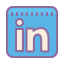
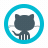

# <span style="color:skyblue">**BashOperator - Data Storage in HDFS**</span>

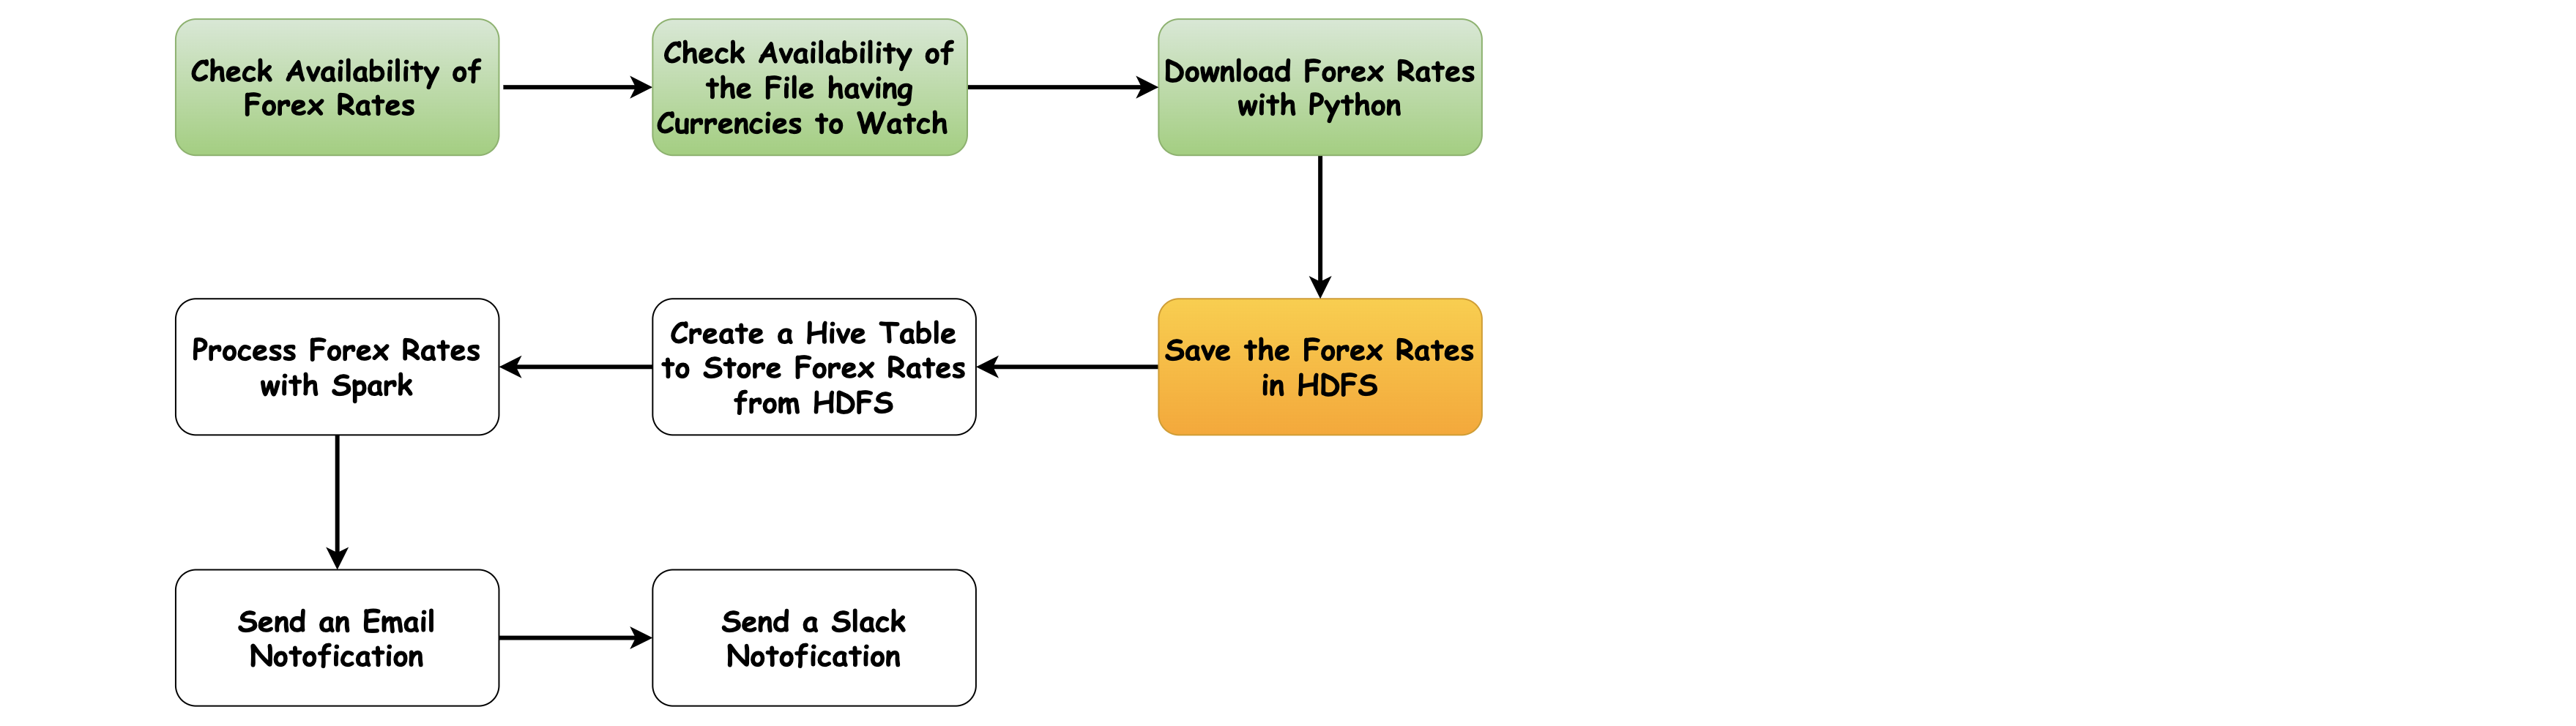

Next task in our data pipeline is to save the forex rates available in `forex_rates.json` into HDFS, a distributed storage system.

In this case, We're going to use `BashOperator` that allows us to execute `bash` commands, like command to push the file into Hdfs.


### <span style="color:orange">Import BashOperator</span>

Here, We need to import `BashOperator` in our DAG file `forex_data_pipeline.py`

```python
from airflow.operators.bash import BashOperator
```

### <span style="color:orange">Bash Command to Save Data into HDFS</span>

```bash
hdfs dfs -mkdir -p /forex && \
hdfs dfs -put -f $AIRFLOW_HOME/dags/files/forex_rates.json /forex
```

Let's break down the provided bash command :

* **hdfs dfs -mkdir -p /forex** : This command creates a directory named `/forex` in HDFS.

    * **`hdfs dfs`** : This command is used to interact with Hadoop Distributed File System (HDFS). It provides a command-line interface to perform various file operations on HDFS.

    * **`-mkdir`** : This option is used to create a directory.

    * **`-p`** : This option ensures that parent directories are created as needed. If the directory already exists, it doesn't throw an error.

* **`&&`** : This is a logical operator in bash that allows executing the second command only if the first command succeeds.

* **`hdfs dfs -put -f $AIRFLOW_HOME/dags/files/forex_rates.json /forex`** : This part of the command uploads the file named `forex_rates.json` from the local file system to the `/forex` directory in HDFS.

    * **`-put`** : This option is used to copy files from the local file system to HDFS.

    * **`-f`** : This option forces an overwrite if the file already exists in the target location.

    * **`$AIRFLOW_HOME/dags/files/forex_rates.json`** : This is the local path of the file to be uploaded. The environment variable `$AIRFLOW_HOME` is used to reference the Airflow home directory.

    * **`/forex`** : This is the target directory in HDFS where the file will be copied.

### <span style="color:orange">Create Bash Task</span>

We need to add a new variable to represent the task, that is `save_forex_rates` here.

```python
save_forex_rates = BashOperator(task_id = "save_forex_rates",
                                bash_command = """
                                    hdfs dfs -mkdir -p /forex && \
                                    hdfs dfs -put -f $AIRFLOW_HOME/dags/files/forex_rates.json /forex
                                """)
```

Here, We have created a task with the necessary parameters :

* **`task_id`** : An unique identifier commonly used for all the tasks / operators. Each operator must have a unique task ID within the DAG.

* **`bash_command`** : Set of commands, or Reference to a Bash script (must be `.sh`) to be executed.

### <span style="color:orange">Setting Up Hue</span>

`Hue` is web-based Hadoop user interface used to explore and query HDFS.

We can open a new tab in our web browser and navigate to `localhost:32762`. This is the address where `Hue` is running.

Once we land on the Hue interface, we're prompted to log in. The default credentials are typically root for both the username and password.

After logging in, We're directed to the user-friendly interface of Hue where we can explore HDFS directories and files.

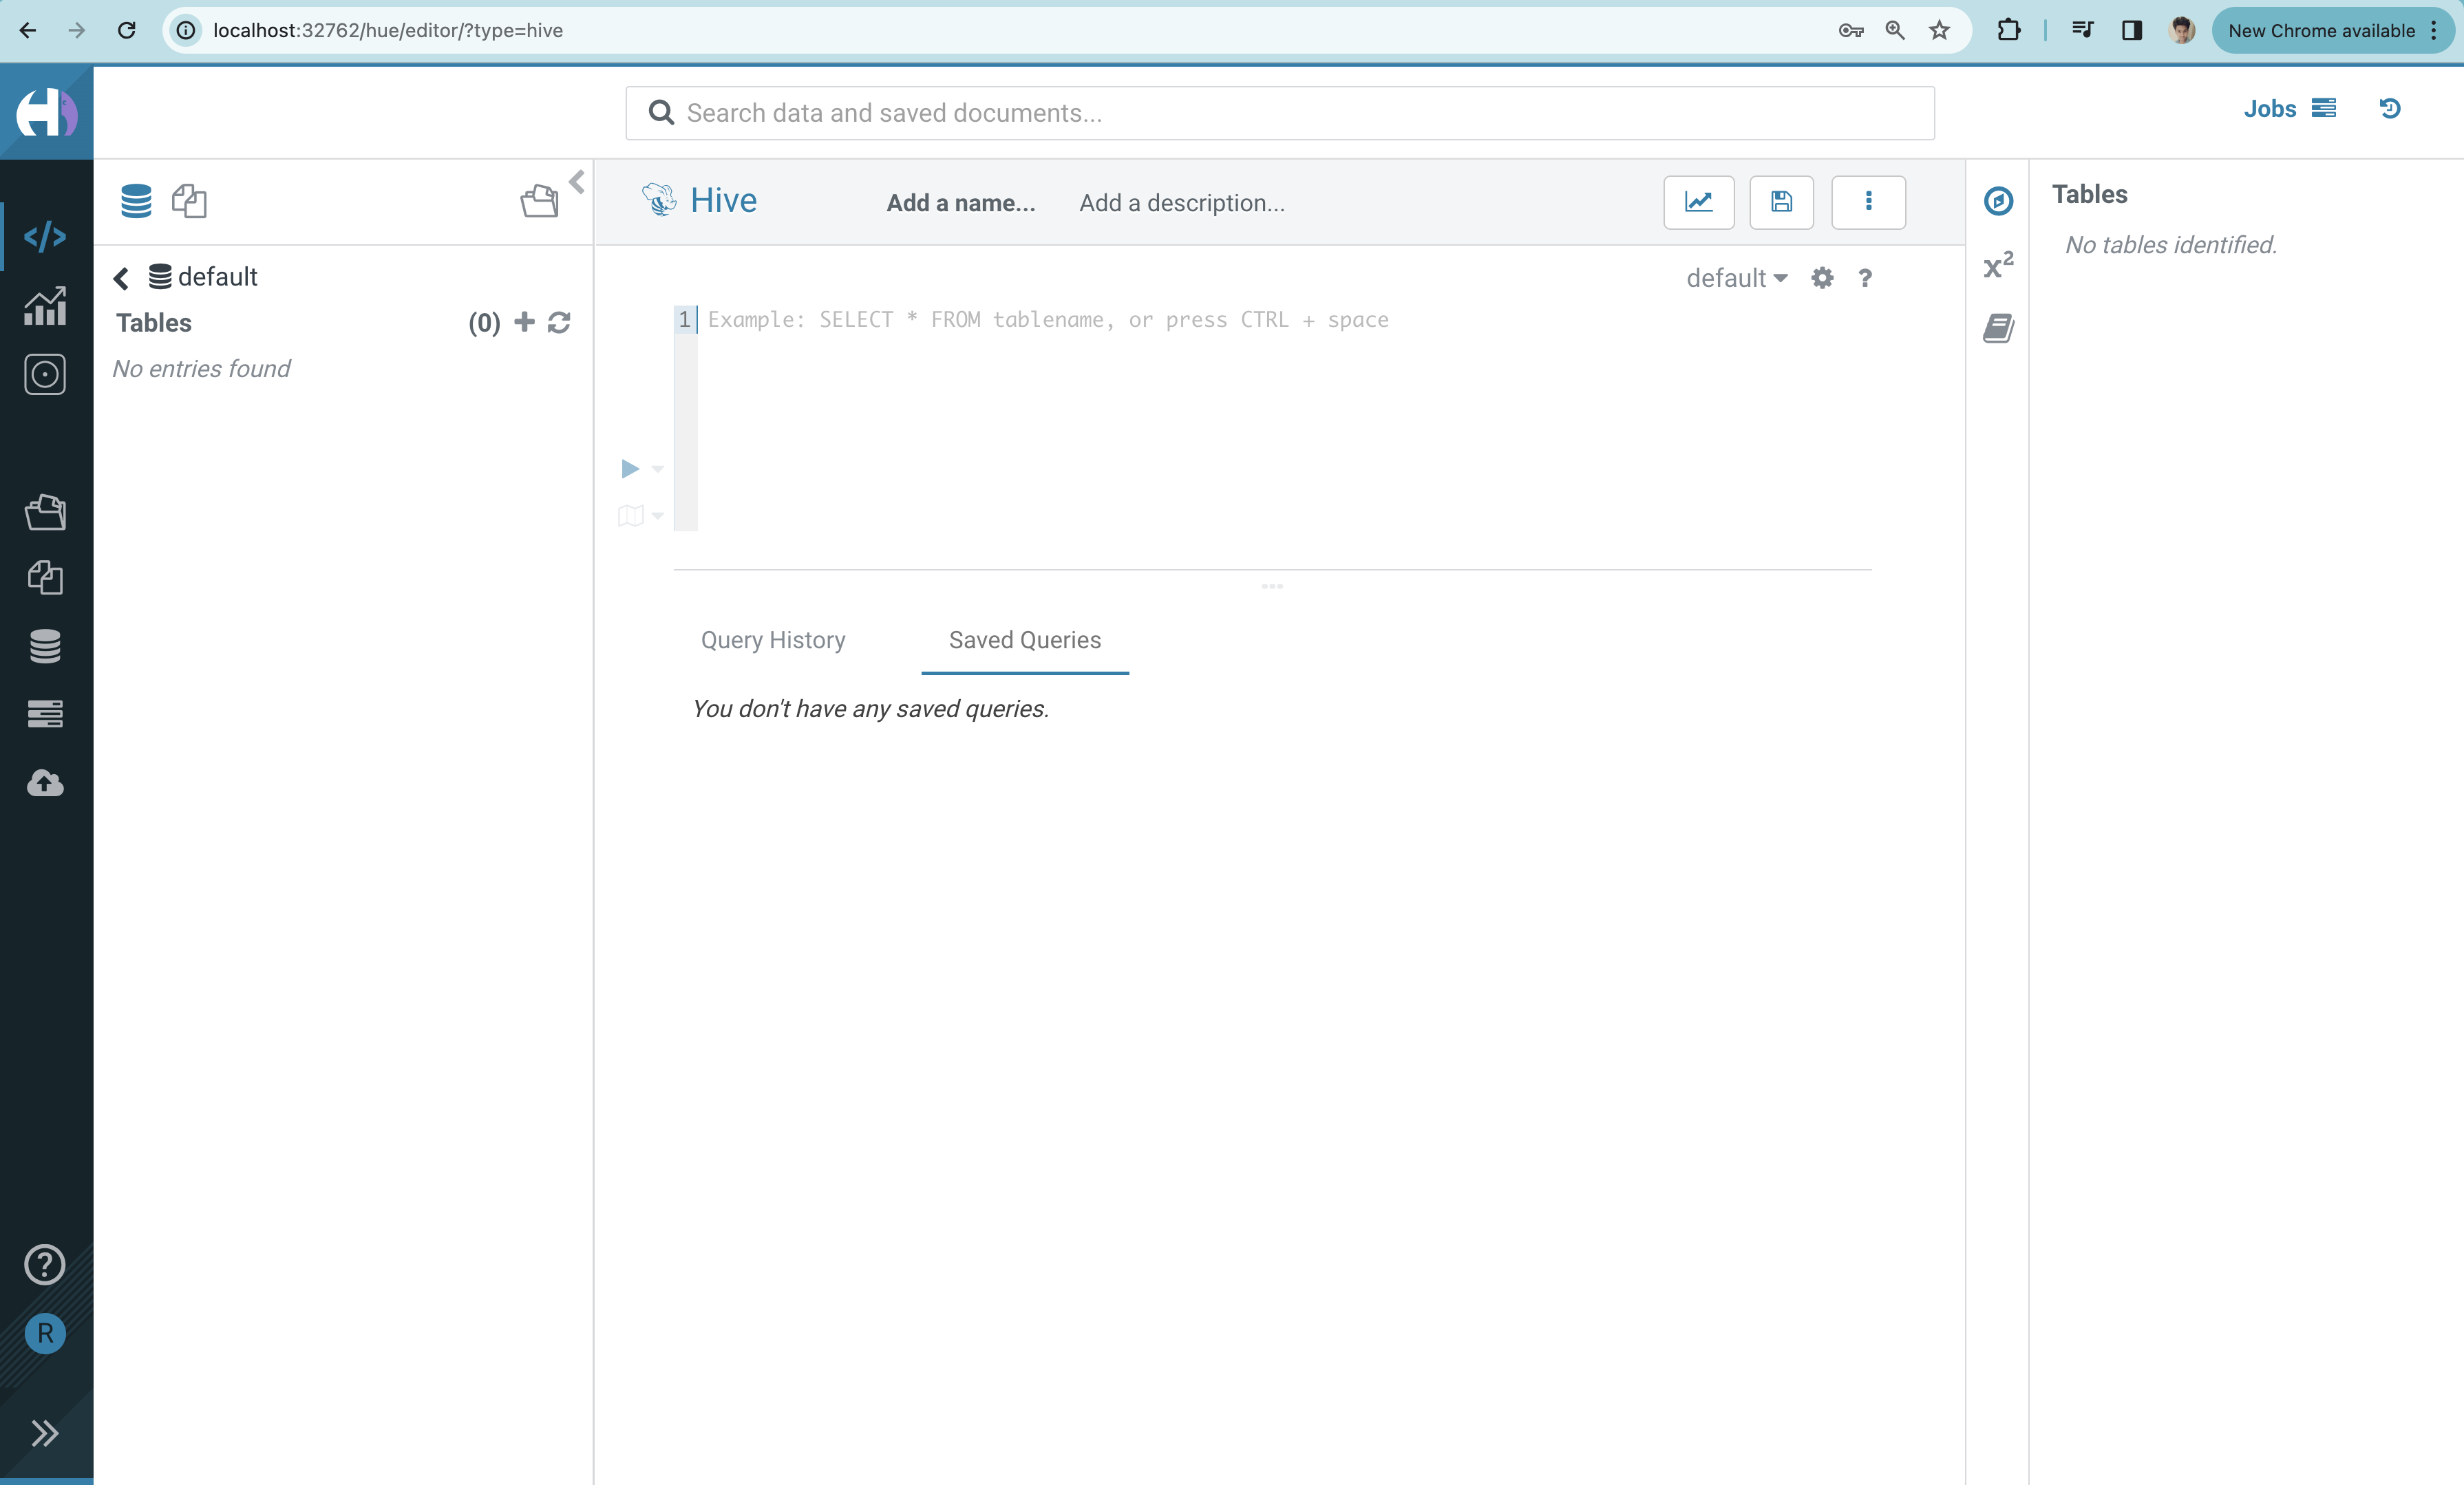

Within Hue, we navigate to the root directory of HDFS (`/user/root`).

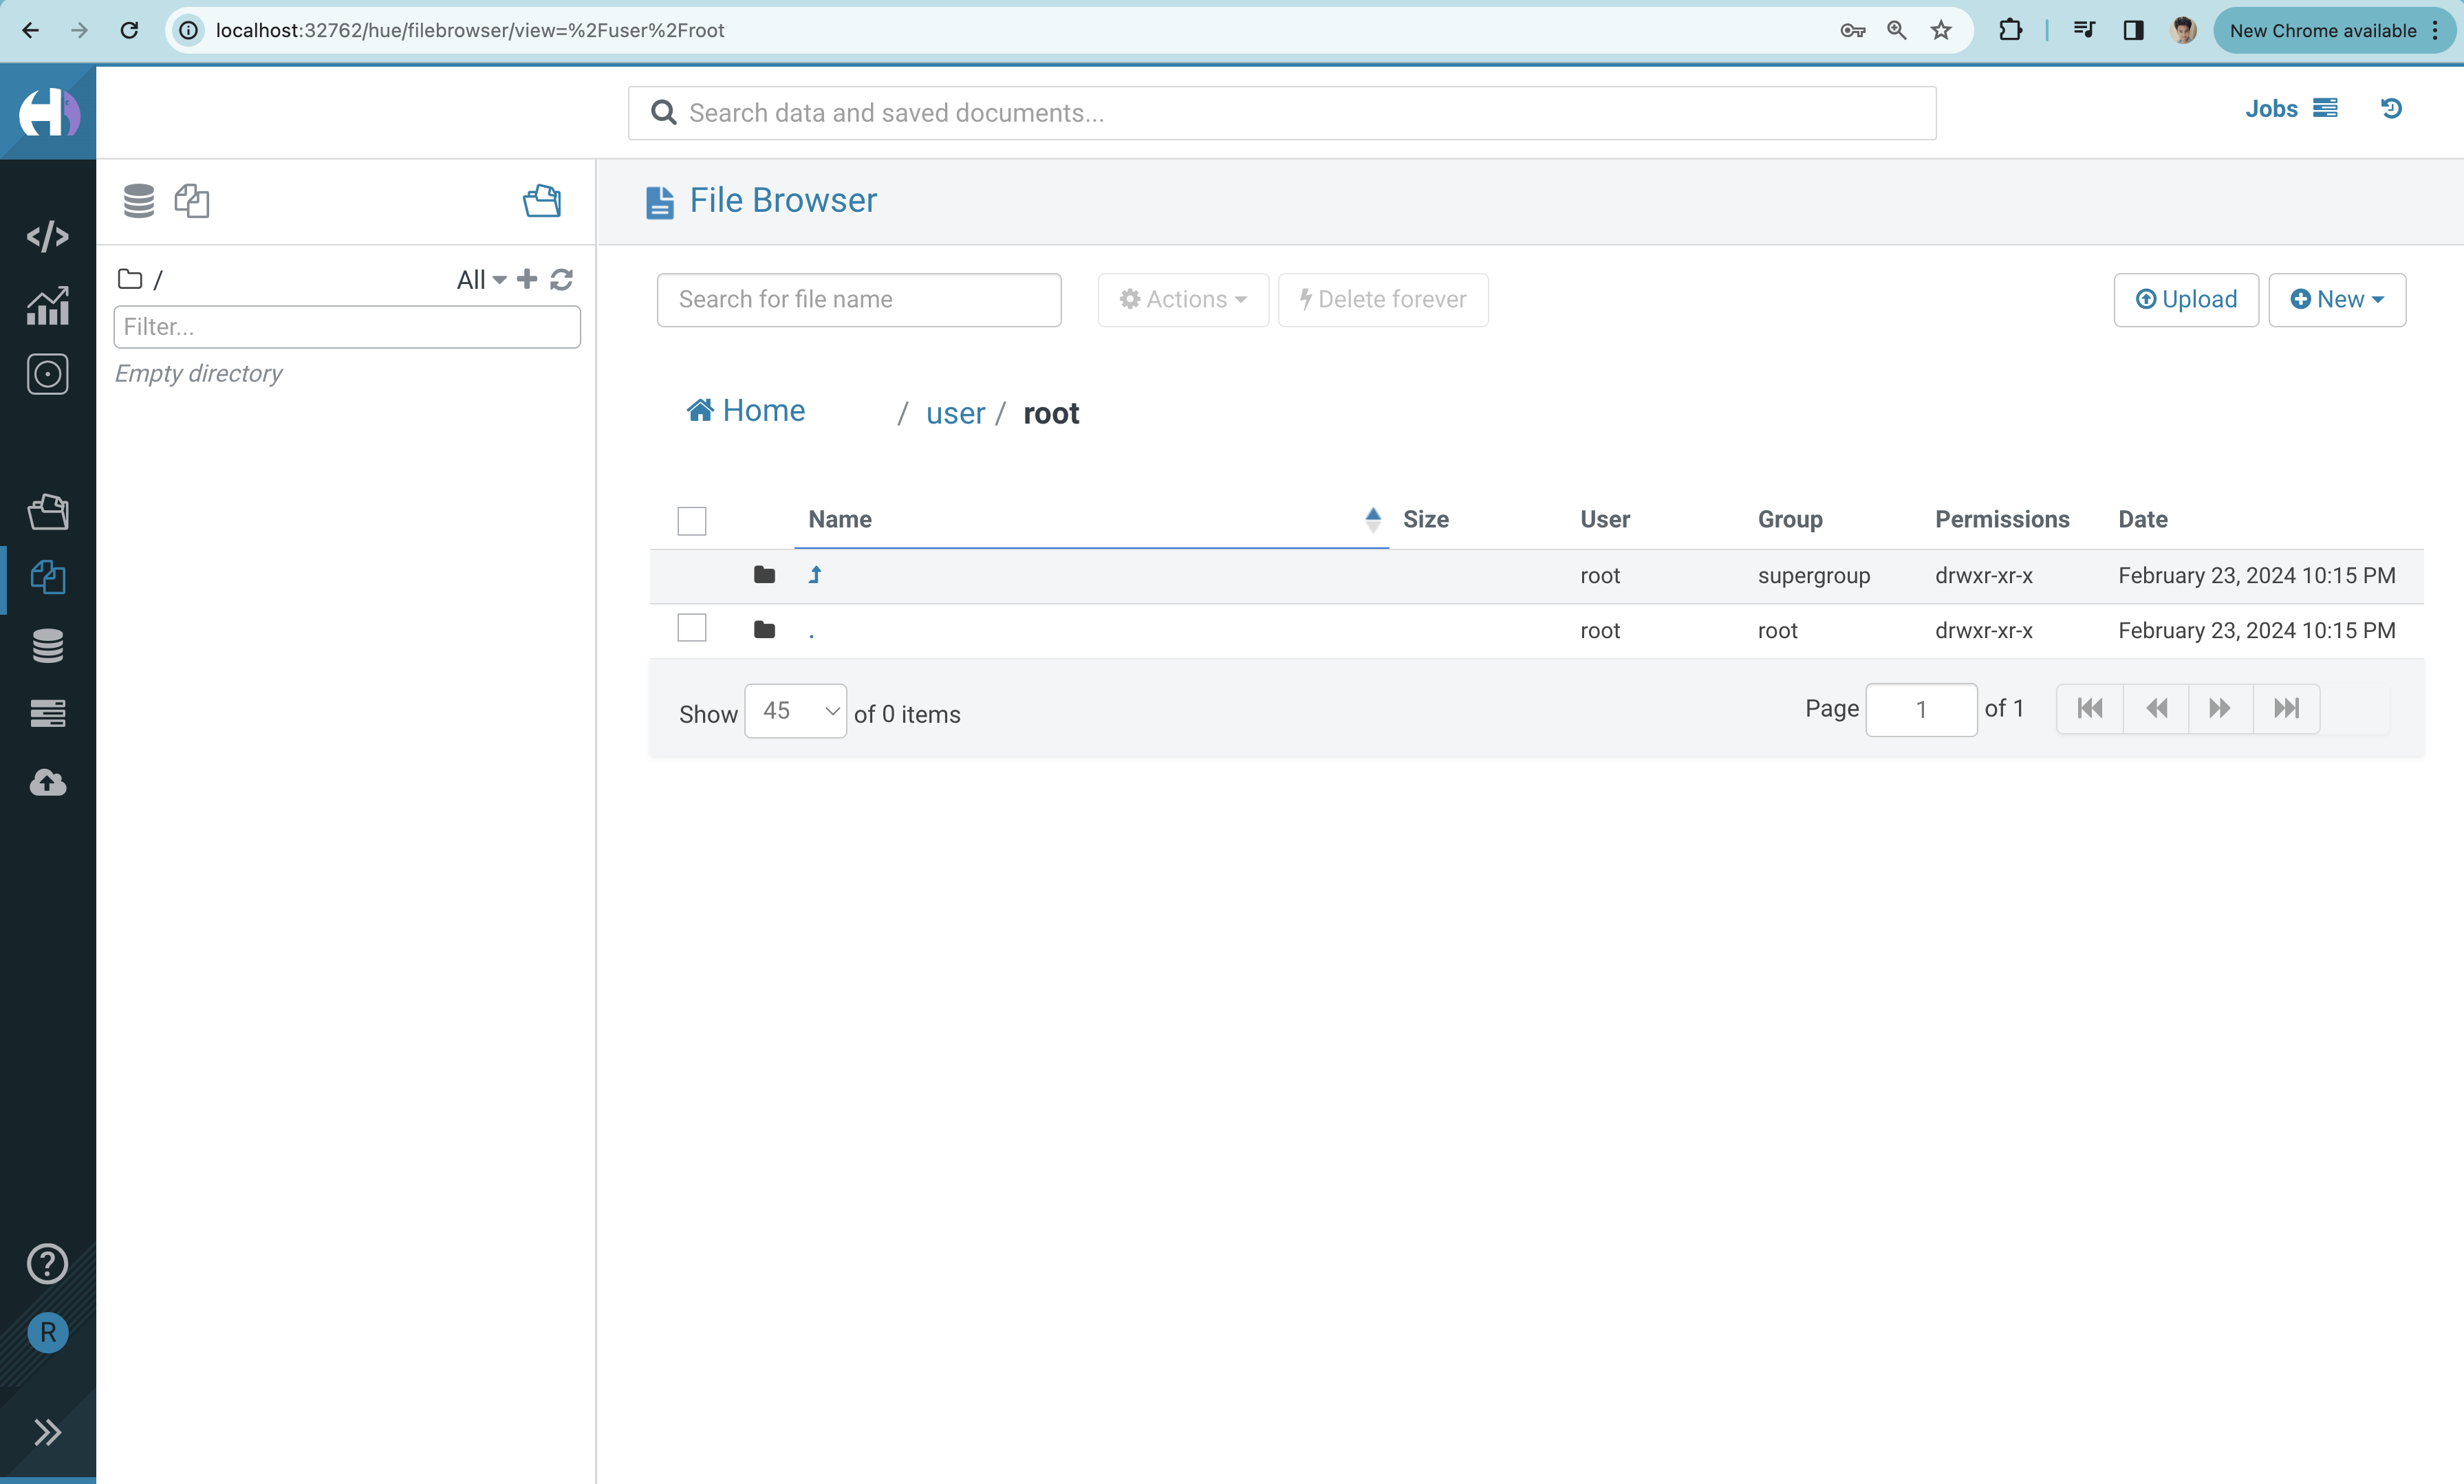

After executing the Bash task, We're expected to find a new folder with the file `forex_rates.json` in it.

### <span style="color:orange">Test / Run Airflow Task</span>

Open a terminal in our code editor and run `docker ps` to list all running Docker containers.

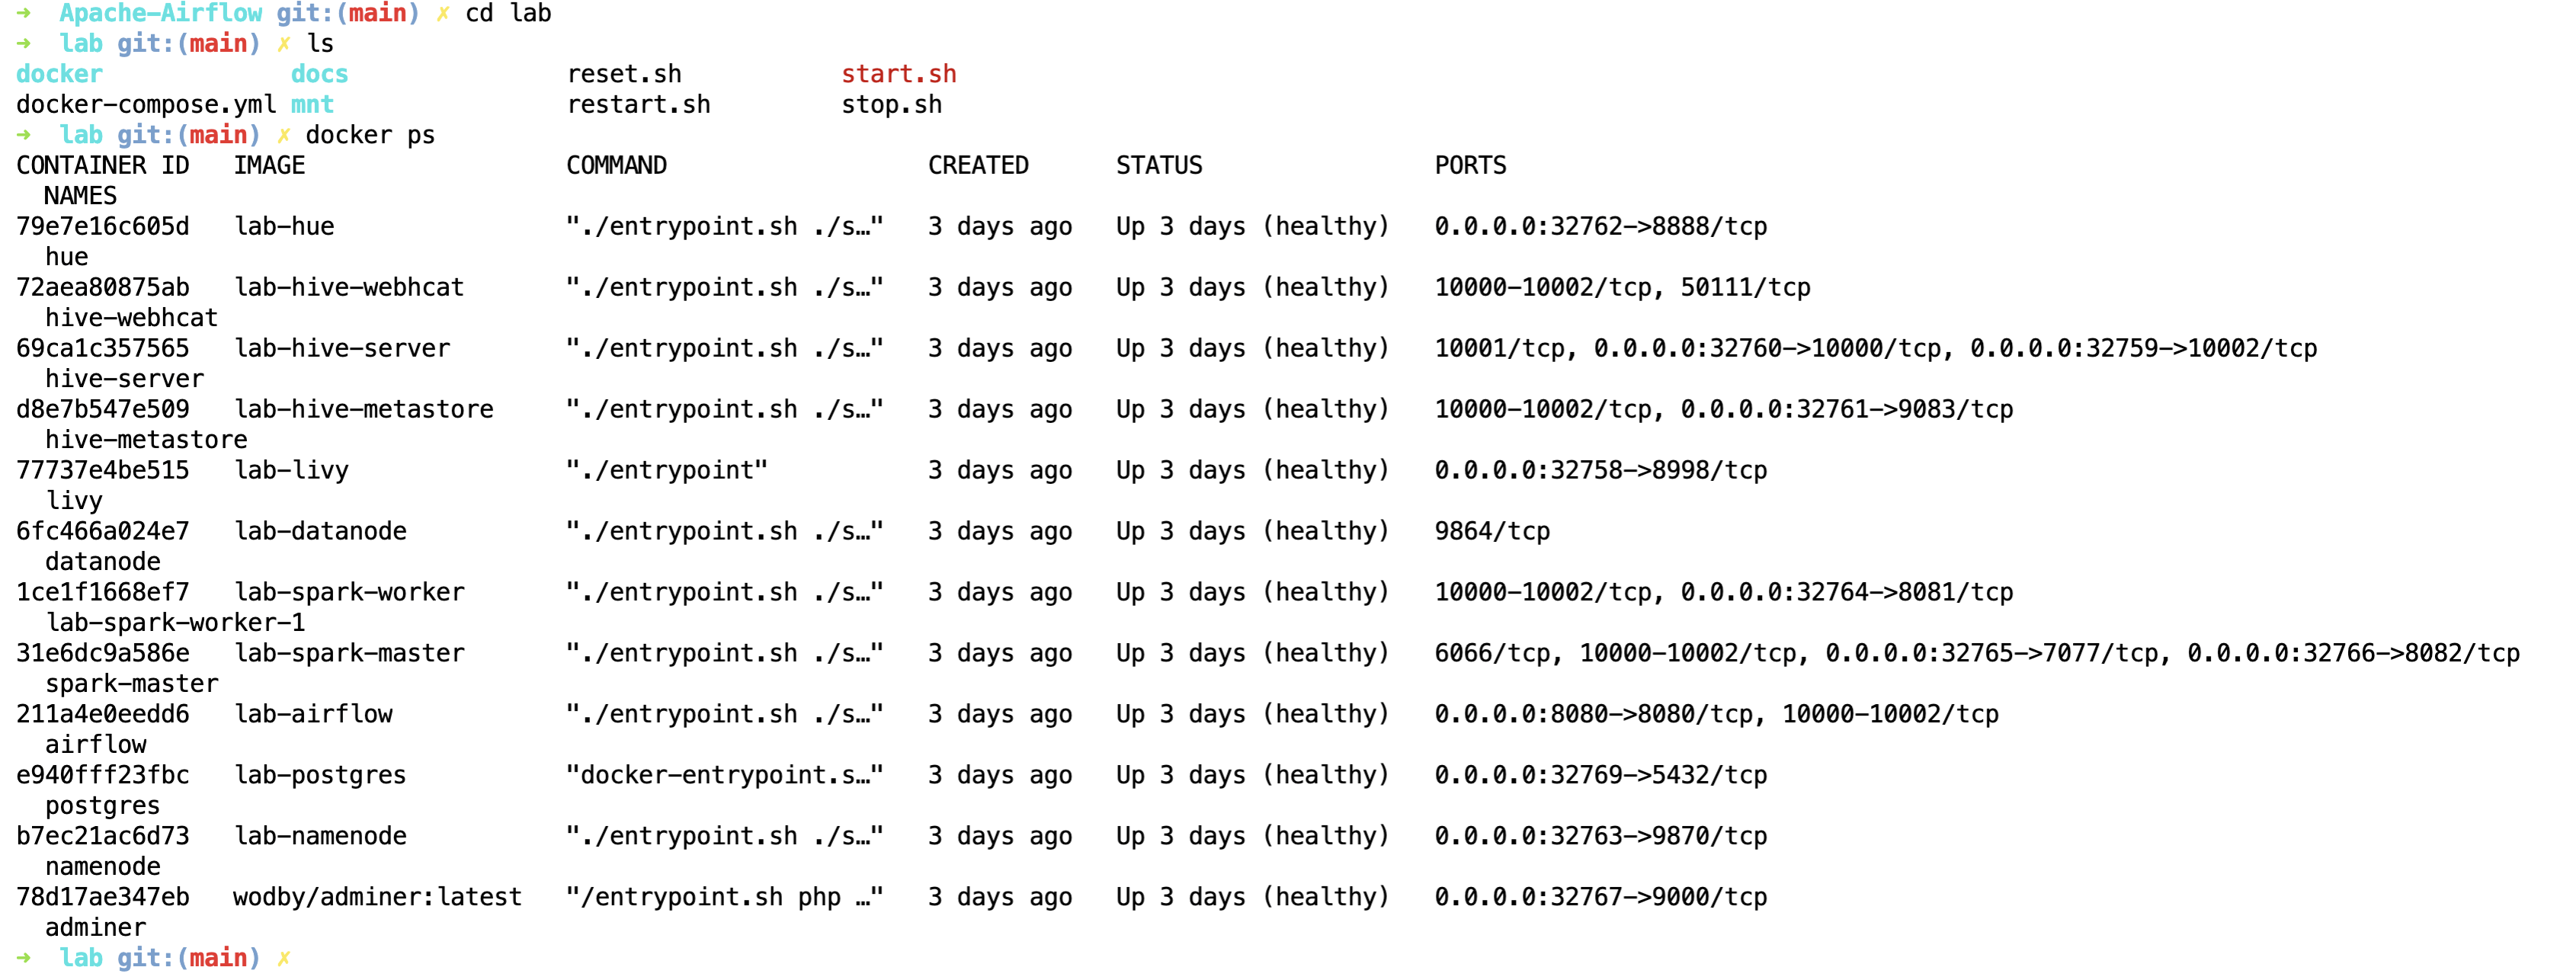

Next, Identify and Copy the container ID of Airflow, that is `211a4e0eedd6`

Now, Run `docker exec -it <container_id> /bin/bash` command to start an interactive bash session within the Airflow container. This command allows direct access to the file system within the container.

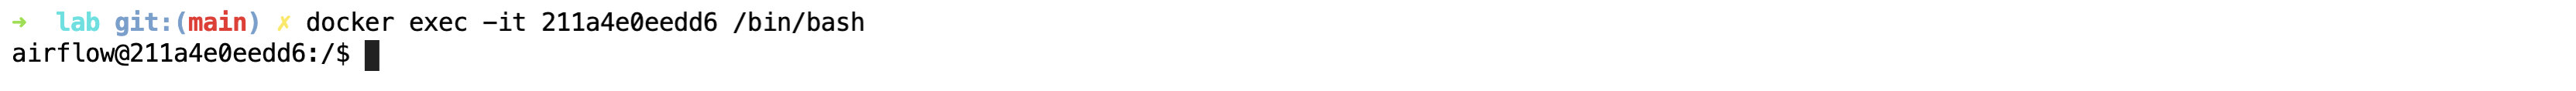

Currently, We are at the `root`.

Now, Run the command `airflow tasks test <DAG_ID> <TASK_ID> <EXECUTION_DATE_IN_THE_PAST>` inside the Airflow container's shell to test the task without storing any states in the metadata of airflow.

```shell
airflow tasks test forex_data_pipeline save_forex_rates 2024-02-01
```

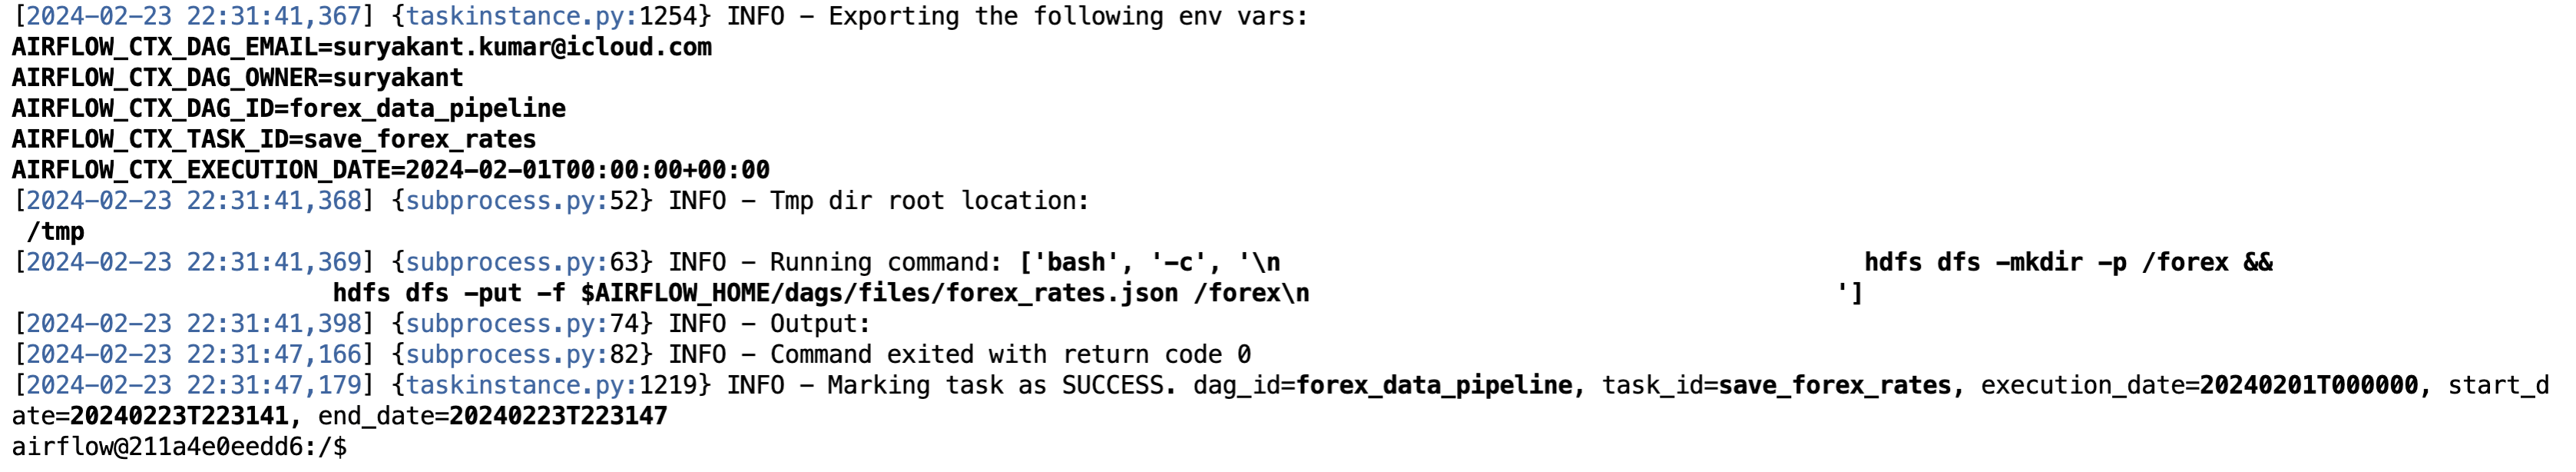

It is showing, the task execution was successful.

Now, `forex_rates.json` has been copied in `forex` directory on HDFS, which is visible by navigating to Hue UI.

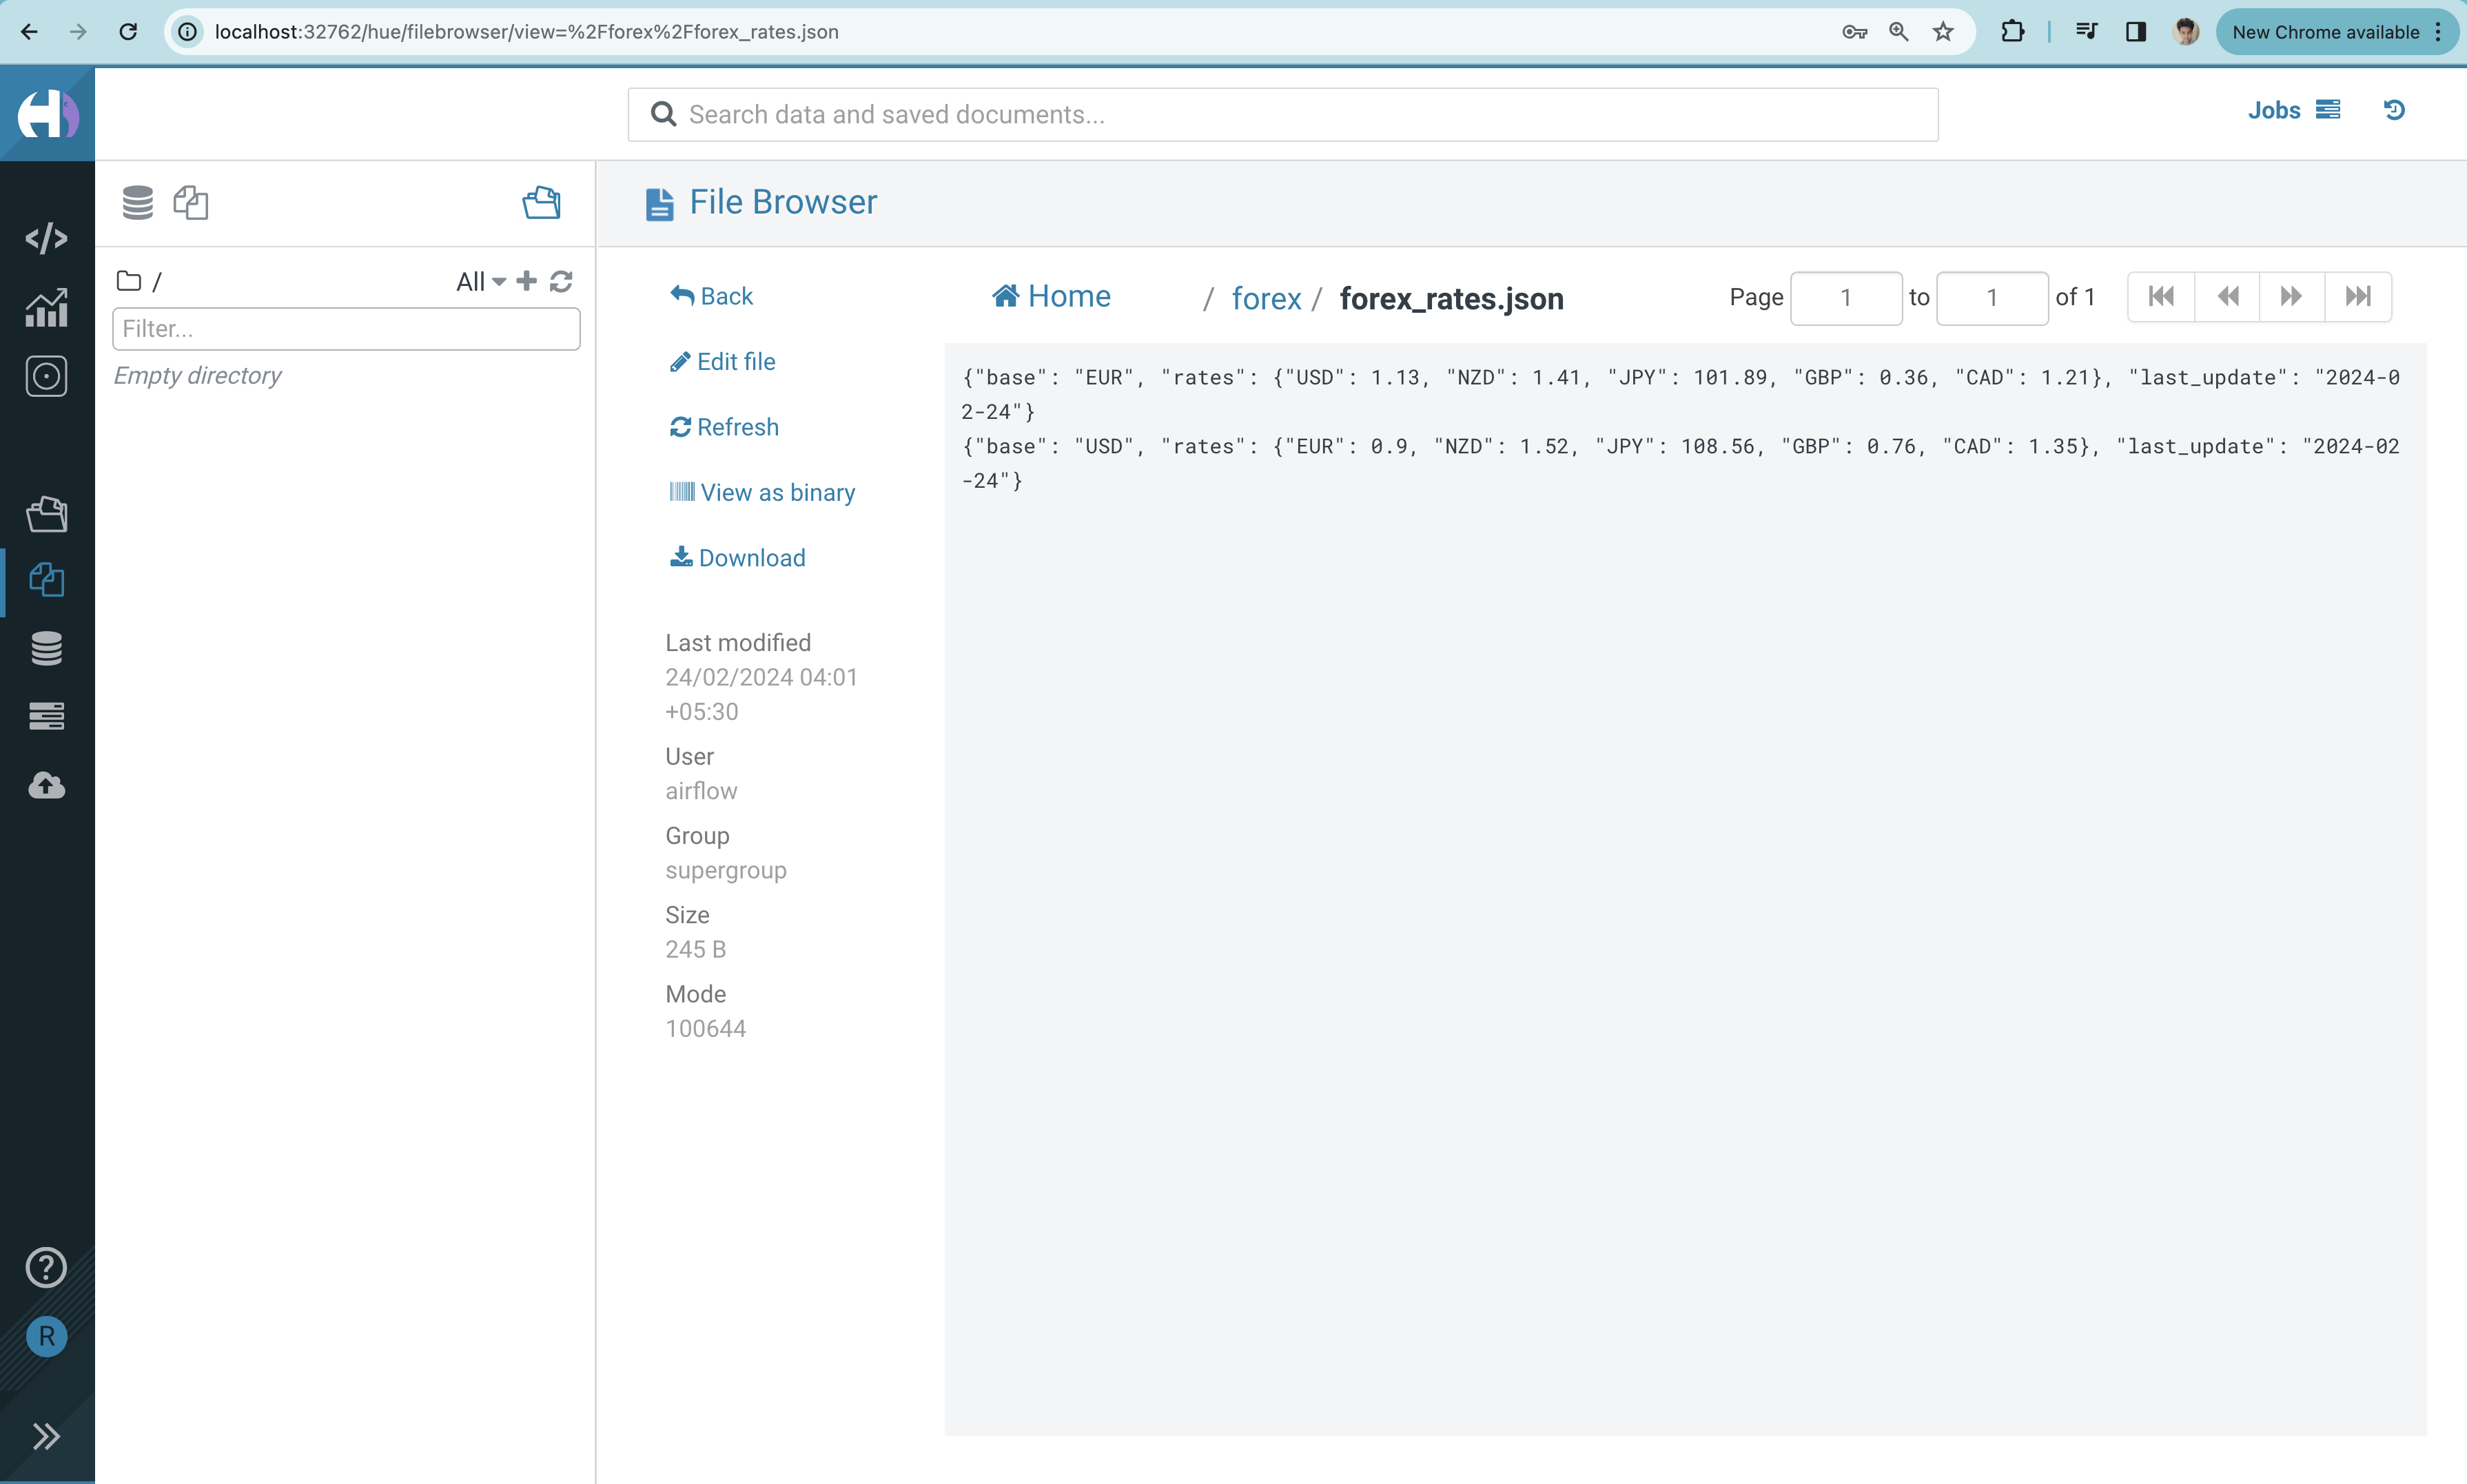